In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

/home/antoine/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/antoine/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


0.5890031902695345

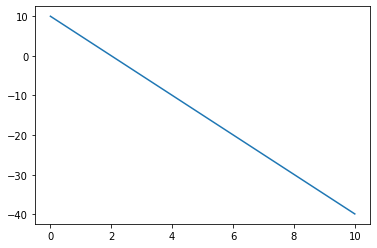

In [11]:
def volatility(S,E,r,T,C_0):
    
    d1 = lambda sigma: (np.log(S/E) + (r + np.power(sigma,2))/2 ) / (sigma * np.power(T, 1/2))
    d2 = lambda sigma: d1(sigma) - sigma * np.power(T,1/2)
    
    Ee = E * np.exp(-r * T)
    
    N1 = lambda sigma: 0.5 * special.erfc(-d1(sigma) / np.power(2,1/2))
    N2 = lambda sigma: 0.5 * special.erfc(-d2(sigma) / np.power(2,1/2))
    
    
    c  = lambda sigma: S * N1(sigma) - Ee * N2(sigma)
    F  = lambda sigma: C_0 - c(sigma)
    
    
    a  = 0
    a1 = a
    
    b  = 10
    b1 = b
    
    d = (a+b)/2
    
    for i in range(300):
        if F(a)*F(d) > 0:
            a=d
        else:
            b=d
        d = (a+b)/2
    
    
    plt.plot(np.vstack([a1,b1]),F(np.vstack([a1,b1])))
    
    return d


S = 50
E = 100
r = 0.05
T = 3
C_0 = 10

volatility(S,E,r,T,C_0)